In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

from mlxtend.preprocessing import MeanCenterer

import seaborn as sns

In [3]:
#Data load
test_data_filepath = '..\\fashion_test.npy'
train_data_filepath = '..\\fashion_train.npy'
fashion_train = np.load(train_data_filepath)
fashion_test = np.load(test_data_filepath)
fashion_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

# Exploratory Data Analysis

In [ ]:
#Class definitions
def tell_class(x):
    class_here = 'Error'
    if x == 0:
        class_here = 'T-shirt/top'
    elif x == 1:
        class_here = 'Trouser'
    elif x == 2:
        class_here = 'Pullover'
    elif x == 3:
        class_here = 'Dress'
    elif x == 4:
        class_here = 'Shirt'

    return(f"Class: {class_here}")

In [45]:
def seperate_image_class(data_point_number):

    combined_array = fashion_train[data_point_number]
    
    array_of_the_image = combined_array[:-1]

    classification_of_the_image = combined_array[-1]

    class_of_the_image = tell_class(classification_of_the_image)


    return array_of_the_image, class_of_the_image


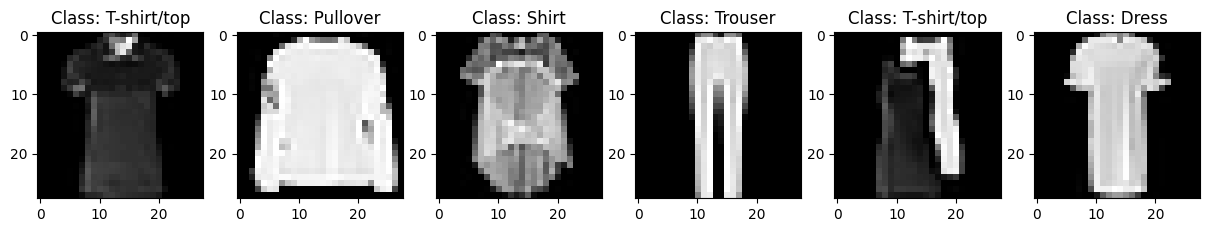

In [59]:
#Plot some images with their given class
image_choices = [100, 4511, 200, 300, 444, 500]

image_shape = (28, 28)

fig, axs = plt.subplots(1, len(image_choices), figsize=(15, 3))

n = 0

for image in image_choices:

        this_image_info = seperate_image_class(image)

        axs[n].imshow(this_image_info[0].reshape(image_shape), cmap='gray')
        axs[n].set_title(f"{this_image_info[1]}")

        n +=1

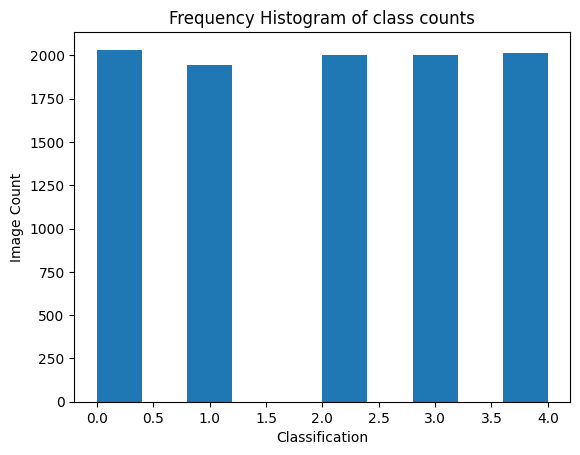

In [69]:
#Plot a frequency histogram of the classes to visualise the spread of classes

all_of_the_classes = []

for array in fashion_train:
    all_of_the_classes.append(array[-1]) #takes the classification value off the end of each datapoint

array_of_the_classes = np.array(all_of_the_classes)

plt.hist(all_of_the_classes)
plt.xlabel("Classification")
plt.ylabel("Image Count")
plt.title("Frequency Histogram of class counts")
plt.show()

#Have code for the grayscale sum, could add here?

# Principal Component Analysis

In [70]:
all_of_the_images = []

for array in fashion_train:
    all_of_the_images.append(array[:-1]) #similarly to before, takes just the image data from each data point

array_of_all_images = np.array(all_of_the_images)

In [71]:
X_train, X_validate, y_train, y_validate = train_test_split(array_of_all_images, array_of_the_classes , test_size = 0.2, random_state = 43, stratify = array_of_the_classes) #I'm hoping that the stratify parameter keeps the balance of classes in the two splits

a=len(X_train)
b=len(X_validate)

print(f'Train size {a} Validate size {b}')

Train size 8000 Validate size 2000


In [75]:
pca = PCA()

# With sklearn PCA, it automatically centers the data
pca.fit(X_train)

# Eigenvalues, PC scores and variance explained
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_ * 100
scores = pca.transform(X_train)

#print("Eigenvalues:", eigenvalues)
#print('Eigenvctors: ', eigenvectors)

In [74]:
print("\nPercentage of variance explained by each PC:")
for i, variance in enumerate(explained_variance_ratio):
    print(f'PC {i+1}: {variance:.2f}%')


Percentage of variance explained by each PC:
PC 1: 32.38%
PC 2: 16.25%
PC 3: 7.78%
PC 4: 4.14%
PC 5: 3.27%
PC 6: 2.25%
PC 7: 1.93%
PC 8: 1.78%
PC 9: 1.51%
PC 10: 1.28%
PC 11: 1.14%
PC 12: 0.96%
PC 13: 0.84%
PC 14: 0.75%
PC 15: 0.72%
PC 16: 0.68%
PC 17: 0.67%
PC 18: 0.63%
PC 19: 0.56%
PC 20: 0.51%
PC 21: 0.48%
PC 22: 0.46%
PC 23: 0.45%
PC 24: 0.43%
PC 25: 0.41%
PC 26: 0.40%
PC 27: 0.37%
PC 28: 0.34%
PC 29: 0.33%
PC 30: 0.30%
PC 31: 0.30%
PC 32: 0.29%
PC 33: 0.28%
PC 34: 0.27%
PC 35: 0.27%
PC 36: 0.25%
PC 37: 0.25%
PC 38: 0.24%
PC 39: 0.23%
PC 40: 0.22%
PC 41: 0.21%
PC 42: 0.21%
PC 43: 0.20%
PC 44: 0.19%
PC 45: 0.19%
PC 46: 0.19%
PC 47: 0.18%
PC 48: 0.17%
PC 49: 0.16%
PC 50: 0.16%
PC 51: 0.16%
PC 52: 0.15%
PC 53: 0.15%
PC 54: 0.15%
PC 55: 0.14%
PC 56: 0.14%
PC 57: 0.13%
PC 58: 0.13%
PC 59: 0.13%
PC 60: 0.13%
PC 61: 0.12%
PC 62: 0.12%
PC 63: 0.12%
PC 64: 0.11%
PC 65: 0.11%
PC 66: 0.11%
PC 67: 0.11%
PC 68: 0.10%
PC 69: 0.10%
PC 70: 0.10%
PC 71: 0.10%
PC 72: 0.10%
PC 73: 0.09%
PC 74: 0.09%

ValueError: Per-column arrays must each be 1-dimensional

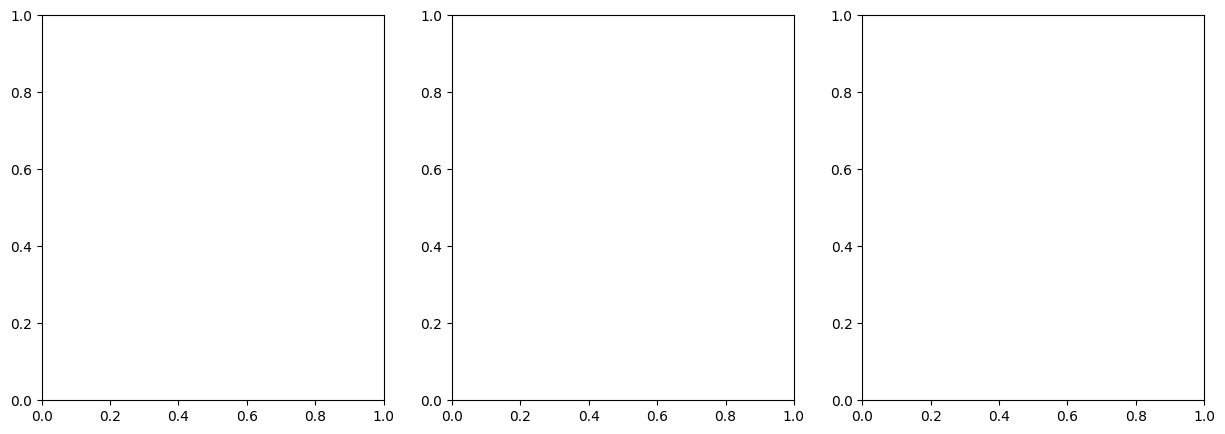

In [78]:
#components = [f'PC{i+1}' for i in range(pcs.shape[1])]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(x=pca.components_, y=pca.explained_variance_, ax=axes[0])
axes[0].set_title('Explained Variance by Principal Components')
axes[0].set_ylabel('Variance')

sns.barplot(x=pca.components_, y=pca.explained_variance_ratio_, ax=axes[1])
axes[1].set_title('Explained Variance Ratio by Principal Components')
axes[1].set_ylabel('Variance Ratio')

sns.lineplot(x=pca.components_, y=np.cumsum(pca.explained_variance_ratio_), ax=axes[2])
axes[2].set_title('Cumulative Explained Variance')
axes[2].set_ylabel('Cumulative Variance Ratio')

plt.tight_layout()
plt.show()